In [2]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa as st
import pandas as pd
import numpy as np

/Users/laneskij/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [6]:
data = pd.read_csv('/Users/laneskij/Desktop/medium.csv', header=None)

In [22]:
#X = np.array(data)
X = []
M = np.array(data)[:,8*60:14*60]
X.append(M[:,0:60])
X.append(M[:,60:120])
X.append(M[:,120:180])
X.append(M[:,180:240])
X.append(M[:,240:300])
X.append(M[:,300:360])



In [47]:
print len(M), len(M[1]), len(X), X[2][0]


1000 360 6 [0.25282422315623204 -0.25780992638688693 -0.07595052500238825
 0.23361413570454315 0.0002950600353606787 -0.24607580443509355
 -0.01164349270205968 0.3359963348569487 0.2279728748157876
 0.0986214734940064 0.4997983106856096 0.9158062782024926
 0.9822915035177114 0.7922917075087038 0.31840365059983944
 0.0021486377534179115 -0.07788800891251288 -0.3634537323773036
 -0.1657430187400264 0.14497567380302132 0.01964136831859669
 0.1727677213321614 -0.06397579400178856 -0.447792564852336
 -0.3413694666279591 -0.12998788826459376 0.02068986593952132
 0.022027007350788518 -0.2048617321927036 -0.1838703434406711
 0.15307628040725724 0.2329163621085351 0.22072450892007686
 0.34395141039360266 0.20249760578950352 0.07939090499932179
 0.24901691267361165 0.042820355522395916 -0.032971197154638816
 0.14377863225123594 0.15364212901761173 0.13508388326097925
 -0.010364455490411036 -0.06423867928014676 -0.2511587578571407
 -0.43220464621509 -0.24762248732204534 0.012887499547616943
 0.04

In [59]:
#Fitting ARIMA(p,d,q)
#with d=0 we have a ARMA(p,q)
#method can be 'css', 'mle-css' and 'mle'

parameters = []
models = []
for item in X[0]:
    model = sm.tsa.ARIMA(item, order=(2,0,0)).fit(method = 'css')
    parameters.append(model.params.tolist())
    models.append(model)

#See other parameters, I don't have any idea how to check the model with them! 
#print model.bic, model.aic, model.hqic
#print sm.stats.durbin_watson(data)
#print model.resid


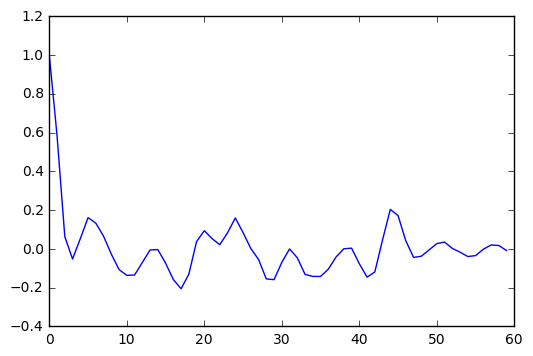

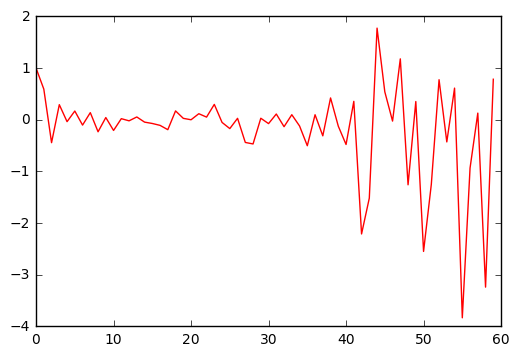

In [27]:
#try to observe the autocorrelation and partial autocorrelation functions for any point
#There is a 3-step rule which determines the p and q by this observation, see reference below
#https://people.duke.edu/~rnau/Notes_on_nonseasonal_ARIMA_models--Robert_Nau.pdf
datapoint = X[0][0]
#autocorrelation
acValues = st.stattools.acf(datapoint, unbiased=False, nlags=60, qstat=False, fft=False, alpha=None)
#partialautocorrelation
pacValues = st.stattools.pacf(datapoint, nlags=60, method='ywunbiased', alpha=None)

plt.plot(acValues, 'b-', label='ac')
plt.show()
plt.plot(pacValues, 'r-', label='pac')
plt.show()

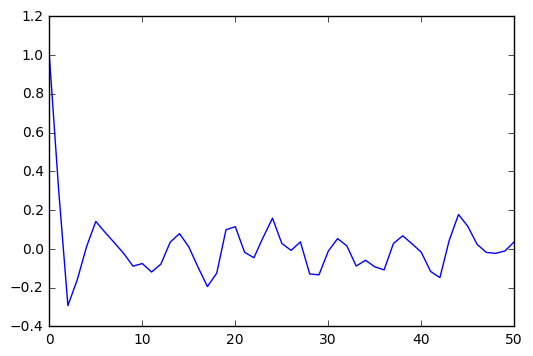

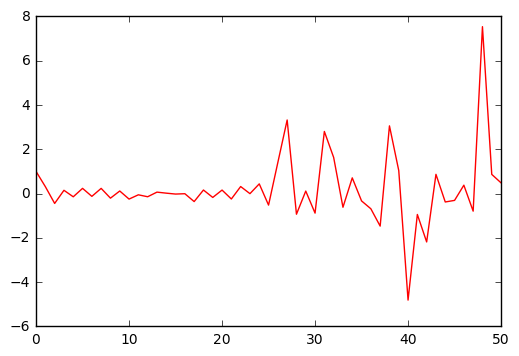

In [28]:
#The acf and pacf for all fitted values
acValues = st.stattools.acf(models[0].fittedvalues, unbiased=False, nlags=50, qstat=False, fft=False, alpha=None)
pacValues = st.stattools.pacf(models[0].fittedvalues, nlags=50, method='ywunbiased', alpha=None)

plt.plot(acValues, 'b-', label='ac')
plt.show()
plt.plot(pacValues, 'r-', label='pac')
plt.show()


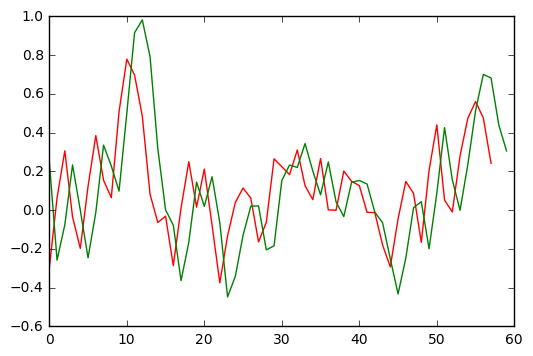

In [58]:
#Check a datapoint values with respect to its fittedvalues
#fittedvalues
index = 0
datapoint = X[2][index]
plt.plot(models[index].fittedvalues, 'r-', label='data')
#real values
plt.plot(datapoint, 'g-', label='y')
#plt.plot(models[1].resid, 'g-', label='pac')
plt.show()


In [13]:
import csv
with open('M3' + '.csv', 'wb') as f:
    writer = csv.writer(f)
    writer.writerows(parameters)

In [3]:
X =(np.array(data)[:,:-1]).astype(np.float32)
Y = (np.array(data)[:,-1])
label_dic = {target:value for value, target in enumerate(sorted(set(Y.tolist())))}
Y = [label_dic[y] for y in Y]